<a href="https://colab.research.google.com/github/shravankoninti/mlcourse.ai-1/blob/master/Medium_code_v1.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.6MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
#train.csv

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1DTuYupJwzsqO3ST99gC9qUt-lFIRVmQe' #https://drive.google.com/open?id=1DTuYupJwzsqO3ST99gC9qUt-lFIRVmQe
downloaded = drive.CreateFile({'id': file_id})


In [0]:
downloaded.GetContentFile('train.csv')

In [0]:

file_id = '1Dy0AC_Yc0kTihNWxwXMYsU8ORPmm1N_q' #https://drive.google.com/open?id=1Dy0AC_Yc0kTihNWxwXMYsU8ORPmm1N_q
downloaded = drive.CreateFile({'id': file_id}) 
  
  

In [0]:
downloaded.GetContentFile('test.csv')

In [0]:

file_id = '1b-7WC4DccQ_PRXoU8GqZcLyHQJxgn-Xm' #https://drive.google.com/open?id=1b-7WC4DccQ_PRXoU8GqZcLyHQJxgn-Xm
downloaded = drive.CreateFile({'id': file_id}) 
  
  

In [0]:
downloaded.GetContentFile('train_log1p_recommends.csv')

In [0]:

file_id = '1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo' #https://drive.google.com/open?id=1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo
downloaded = drive.CreateFile({'id': file_id}) 
  
downloaded.GetContentFile('sample_submission.csv')

In [0]:

file_id = '1deW6wNf8z0uWo9zw_kHndRlV_vwFjyj5' #https://drive.google.com/open?id=1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo
downloaded = drive.CreateFile({'id': file_id}) 
  
downloaded.GetContentFile('content_sparse_train.npz')

# https://drive.google.com/open?id=1deW6wNf8z0uWo9zw_kHndRlV_vwFjyj5

In [0]:
file_id = '1IrnAgpRdvDlgmHOjElH3zo90aYllyRg1' #https://drive.google.com/open?id=1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo
downloaded = drive.CreateFile({'id': file_id}) 
  
downloaded.GetContentFile('X_tr.npz')

# https://drive.google.com/open?id=1IrnAgpRdvDlgmHOjElH3zo90aYllyRg1

file_id = '1aIvNkdMappRy8-RDo3z7W6Kq1qZHG8s2' #https://drive.google.com/open?id=1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo
downloaded = drive.CreateFile({'id': file_id}) 
  
downloaded.GetContentFile('X_test.npz')



In [11]:
!ls

adc.json		  sample_submission.csv  train_log1p_recommends.csv
content_sparse_train.npz  test.csv		 X_test.npz
sample_data		  train.csv		 X_tr.npz


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

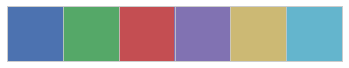

In [12]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import json
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error


import numpy as np
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from scipy.sparse import csr_matrix, hstack
from scipy.stats import probplot
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns 
import gc
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.preprocessing import StandardScaler
from scipy.sparse import (csr_matrix, hstack)


import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import (PorterStemmer, WordNetLemmatizer)
from sklearn.feature_extraction.text import (CountVectorizer,
                                             TfidfVectorizer)
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import (RidgeCV, Ridge)
from sklearn.model_selection import (GridSearchCV, 
                                     cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler
from scipy.sparse import (csr_matrix, hstack)

import nltk
nltk.download("popular")
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS


color = sns.color_palette()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.palplot(color)

In [13]:
# read data from file
# train = pd.read_csv("../input/train.csv") 
# test = pd.read_csv("../input/test.csv")

train = pd.read_csv("train.csv", index_col = 0, encoding = 'utf-8') 
test = pd.read_csv("test.csv", index_col = 0 ,encoding = 'utf-8')

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 62313
Number of features in train: 14
Number of data points in test: 34645
Number of features in test: 13


In [14]:
train.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target
0,Susan BrattonTrusted Hot Sex Advisor To Millio...,1970-01-01 00:00:00.001,Saving Your Marriage By Watching Steamy Sex Ed...,Susan Bratton,medium.com,Lovemaking Sex SexPositions EarlyBird SexEdVideos,5473,http://personallifemedia.com/2017/01/saving-ma...,3,1970,1,0,5,1.09861
1,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",1970-01-01 00:00:00.001,やってよかった中学受験,Ryo Ooishi,medium.com,NaN,5325,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,3,1970,1,0,0,2.56495


In [15]:
test.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags
0,Member previewHITRECORDhitrecord.org is a new ...,2018-02-21 17:01:00.928,"For Night Owls, the Day Starts with a Nocturna...",HITRECORD,medium.com,MorningRoutines Hitrecord Podcast Night,12500,https://medium.com/on-mornings/nocturnalmornin...,2,2018,2,17,4
1,Member previewMaria Bustillosis a journalist a...,2017-12-07 15:56:00.967,Blockchain is Memory,Maria Bustillos,medium.com,Blockchain Technology History Network WordsTha...,6703,https://medium.com/wordsthatmatter/never-break...,3,2017,12,15,5


In [16]:
train.dtypes

content            object
published          object
title              object
author             object
domain             object
tags               object
length              int64
url                object
dow                 int64
year                int64
month               int64
hour                int64
number_of_tags      int64
target            float64
dtype: object

## Other Features

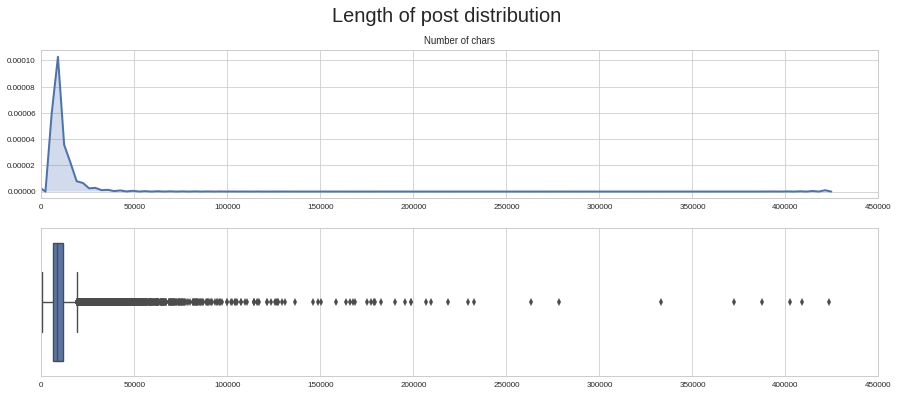

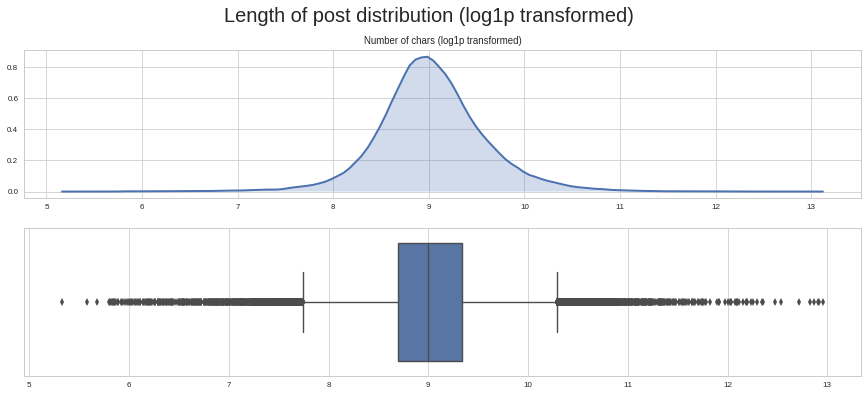

In [17]:
plt.figure(figsize=(15,6))
plt.suptitle("Length of post distribution",fontsize=20)
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1),(0,0))
plt.xlim(0, 450000)
sns.distplot(train.length.values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of chars")

plt.subplot2grid((2,1),(1,0))
plt.xlim(0, 450000)
sns.boxplot(train.length.values);

plt.figure(figsize=(15,6))
plt.suptitle("Length of post distribution (log1p transformed)",fontsize=20)
gridspec.GridSpec(2,1)


plt.subplot2grid((2,1),(0,0))
sns.distplot(np.log1p(train.length.values), hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of chars (log1p transformed)")

plt.subplot2grid((2,1),(1,0))
sns.boxplot(np.log1p(train.length.values));

Text(0.5, 1.0, 'Target')

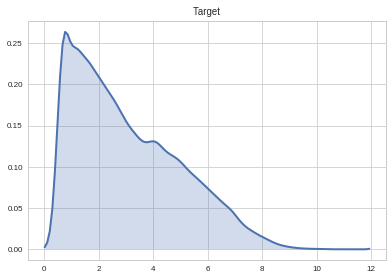

In [18]:

sns.distplot(train.target.values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Target")

Text(0.5, 1.0, 'Number of Target (log1p transformed)')

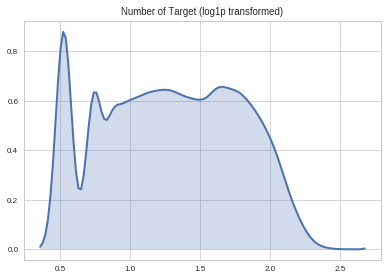

In [19]:

sns.distplot(np.log1p(train.target.values), hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of Target (log1p transformed)")

In [20]:
train.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target
0,Susan BrattonTrusted Hot Sex Advisor To Millio...,1970-01-01 00:00:00.001,Saving Your Marriage By Watching Steamy Sex Ed...,Susan Bratton,medium.com,Lovemaking Sex SexPositions EarlyBird SexEdVideos,5473,http://personallifemedia.com/2017/01/saving-ma...,3,1970,1,0,5,1.09861
1,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",1970-01-01 00:00:00.001,やってよかった中学受験,Ryo Ooishi,medium.com,NaN,5325,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,3,1970,1,0,0,2.56495


In [21]:
train.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags', 'target'],
      dtype='object')

In [22]:
test.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags
0,Member previewHITRECORDhitrecord.org is a new ...,2018-02-21 17:01:00.928,"For Night Owls, the Day Starts with a Nocturna...",HITRECORD,medium.com,MorningRoutines Hitrecord Podcast Night,12500,https://medium.com/on-mornings/nocturnalmornin...,2,2018,2,17,4
1,Member previewMaria Bustillosis a journalist a...,2017-12-07 15:56:00.967,Blockchain is Memory,Maria Bustillos,medium.com,Blockchain Technology History Network WordsTha...,6703,https://medium.com/wordsthatmatter/never-break...,3,2017,12,15,5


In [23]:
test.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags'],
      dtype='object')

In [24]:
print(train['year'].nunique())
print(train['domain'].nunique())
print(train['hour'].nunique())
print(train['month'].nunique())
print(train['dow'].nunique())
print(train['author'].nunique())

17
221
24
12
7
31331


In [25]:
%%time

idx_split = len(train)
df_full = pd.concat([train, test])
df_full['length'] = np.log1p(df_full['length'])






df_full['published'] = df_full[['published']].apply(pd.to_datetime)


# Your code is here


df_full['holiday']     = (df_full['published'].dt.dayofweek >= 5).astype(int) 

df_full['work_hours'] = df_full['published'].apply(lambda ts: 1 if (ts.date().weekday() in (0,1,2,3,4)) &
                                             ((ts.hour>=8)&(ts.hour<=17)&(ts.hour!=12)) else 0)


CPU times: user 1.11 s, sys: 17.8 ms, total: 1.12 s
Wall time: 1.13 s


In [26]:

df_full.columns

Index(['author', 'content', 'domain', 'dow', 'hour', 'length', 'month',
       'number_of_tags', 'published', 'tags', 'target', 'title', 'url', 'year',
       'holiday', 'work_hours'],
      dtype='object')

In [27]:

list_to_dums = [ 'dow', 'month', 'hour', 
                'year', 
                'number_of_tags'
               ]
dummies = pd.get_dummies(df_full, columns = list_to_dums, drop_first=True,
                            prefix=list_to_dums, sparse=False)

X_train_feats = dummies.iloc[:idx_split, :]
X_test_feats = dummies.iloc[idx_split:, :]



print('TRAIN feats: {}'.format(X_train_feats.shape))
print('TEST feats: {}'.format(X_test_feats.shape))
del dummies, df_full
gc.collect()

TRAIN feats: (62313, 74)
TEST feats: (34645, 74)


150

In [28]:
X_train_feats.columns

Index(['author', 'content', 'domain', 'length', 'published', 'tags', 'target',
       'title', 'url', 'holiday', 'work_hours', 'dow_1', 'dow_2', 'dow_3',
       'dow_4', 'dow_5', 'dow_6', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1987',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'number_of_tags_1', 'number_of_tags_2', 'number_of_tags_3',
       'number_of_tags_4', 'number_of_tags_5', 'number_of_tags_6'],
      dtype='object')

In [29]:
X_train_feats.head(2)

,author,content,domain,length,published,tags,target,title,url,holiday,...,year_2015,year_2016,year_2017,year_2018,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6
0,Susan Bratton,Susan BrattonTrusted Hot Sex Advisor To Millio...,medium.com,8.607765,1970-01-01 00:00:00.001,Lovemaking Sex SexPositions EarlyBird SexEdVideos,1.09861,Saving Your Marriage By Watching Steamy Sex Ed...,http://personallifemedia.com/2017/01/saving-ma...,0,...,0,0,0,0,0,0,0,0,1,0
1,Ryo Ooishi,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",medium.com,8.580356,1970-01-01 00:00:00.001,NaN,2.56495,やってよかった中学受験,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
class StemmingLemmatizingTokenizer(object):
    
    def __init__(self, stemmer=PorterStemmer, lemmatizer=WordNetLemmatizer):
        self.stemmer = stemmer()
        self.lemmatizer = lemmatizer()
        
    def __call__(self, doc):
        # strings of punctuation signs and digits
        from string import punctuation, digits
        # some other unicode chars i found in the content
        other_unicode_chars = '’’”“\u200b'
        chars_to_remove = ''.join((punctuation,
                                   digits,
                                   other_unicode_chars))
        # getting rid of punctuation signs and digits
        transtab = str.maketrans(chars_to_remove, ' '*len(chars_to_remove))
        # goiinf through all tokens with 3 or more chars
        # lemmatizing the verbs first, then stemming all words
        return [self.stemmer.stem(self.lemmatizer.lemmatize(token, pos='v')) 
                for token in word_tokenize(doc.translate(transtab)) 
                if len(token) >= 3]

In [0]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS
temp = []
s = StemmingLemmatizingTokenizer()
for eggs in stop_words:
    token = s(eggs)
    if token:
        temp += token
stop_words = temp

In [0]:
author_vectorizer = CountVectorizer()
counts_scaler = StandardScaler()
content_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                     tokenizer=StemmingLemmatizingTokenizer(),
                                     stop_words=stop_words,
                                     max_features=80000)
title_vectorizer = TfidfVectorizer(ngram_range=(2, 3), 
                                   tokenizer=StemmingLemmatizingTokenizer(),
                                   stop_words=stop_words,
                                   max_features=80000)

In [33]:
%%time
author_sparse = author_vectorizer.fit_transform(X_train_feats['author'])

CPU times: user 602 ms, sys: 4.76 ms, total: 606 ms
Wall time: 701 ms


In [0]:
# %%time
# content_sparse = content_vectorizer.fit_transform(X_train_feats['content'])

In [0]:
def get_title_features(titles):
    titles_lengths = np.array([len(title.split()) for title in titles])
    is_short = (titles_lengths<6).astype('int')
    is_medium = ((titles_lengths>=6) & (titles_lengths<11)).astype('int')
    is_long = ((titles_lengths>=11) & (titles_lengths<20)).astype('int')
    is_huge = (titles_lengths>=20).astype('int')
    
    length_types = np.hstack([is_short.reshape(-1, 1),
                              is_medium.reshape(-1, 1),
                              is_long.reshape(-1, 1),
                              is_huge.reshape(-1, 1) ])
    return length_types

In [36]:
%%time

title_length_types = get_title_features(X_train_feats['title'])

CPU times: user 76.7 ms, sys: 592 µs, total: 77.2 ms
Wall time: 83 ms


In [37]:
%%time
title_sparse = title_vectorizer.fit_transform(X_train_feats['title'])

CPU times: user 25.3 s, sys: 117 ms, total: 25.4 s
Wall time: 25.5 s


In [38]:
X_train_feats['length'].describe()

count    62313.000000
mean         9.026759
std          0.574208
min          5.327876
25%          8.699681
50%          9.001839
75%          9.337413
max         12.955773
Name: length, dtype: float64

In [39]:
%%time
content_sparse_train = content_vectorizer.fit_transform(X_train_feats['content'])

CPU times: user 1h 18min 40s, sys: 20.4 s, total: 1h 19min 1s
Wall time: 1h 19min 59s


In [0]:
from scipy import sparse

sparse.save_npz("content_sparse_train.npz", content_sparse_train)
content_sparse_train = sparse.load_npz("content_sparse_train.npz")
X_tr = sparse.load_npz("X_tr.npz")

In [41]:
content_sparse_train

<62313x80000 sparse matrix of type '<class 'numpy.float64'>'
	with 30759913 stored elements in Compressed Sparse Row format>

In [42]:
X_train_feats.columns

Index(['author', 'content', 'domain', 'length', 'published', 'tags', 'target',
       'title', 'url', 'holiday', 'work_hours', 'dow_1', 'dow_2', 'dow_3',
       'dow_4', 'dow_5', 'dow_6', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1987',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'number_of_tags_1', 'number_of_tags_2', 'number_of_tags_3',
       'number_of_tags_4', 'number_of_tags_5', 'number_of_tags_6'],
      dtype='object')

In [0]:
train_target = X_train_feats['target'].values
X_train_feats.drop(['author','content', 'title','domain', 'tags', 'published', 'url',  'target'], axis=1, inplace=True)

In [44]:
X_train_feats.columns

Index(['length', 'holiday', 'work_hours', 'dow_1', 'dow_2', 'dow_3', 'dow_4',
       'dow_5', 'dow_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1987', 'year_2003',
       'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'number_of_tags_1', 'number_of_tags_2', 'number_of_tags_3',
       'number_of_tags_4', 'number_of_tags_5', 'number_of_tags_6'],
      dtype='object')

In [45]:
X_train_feats.head(2)

,length,holiday,work_hours,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_2,...,year_2015,year_2016,year_2017,year_2018,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6
0,8.607765,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.580356,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extracting Features with LDA

Shortly, LDA represents documents as mixtures of topics that spit out words with certain probabilities.

For each possible topic Z, we'll multiply the frequency of this word type W in Z by the number of other words in document D that already belong to Z. The result will represent the probability that this word came from Z. Here's the actual formula:

Finding the right parameters for LDA is 'an art'.

3 main parameters need to be optimized:

K: the number of topics
Alpha which dictates how many topics a document potentially has. The lower alpha, the lower the number of topics per documents
Beta which dictates the number of word per document. Similarly to Alpha, the lower Beta is, the lower the number for words per topic.

In [0]:
# tmp_scaled = StandardScaler().fit_transform(X_train_feats[[ 'dow', 'month', 'hour',  'year', 'number_of_tags','content_length', 'holiday', 'work_hours']])

lengths_scaler = StandardScaler()
length_scaled = lengths_scaler.fit_transform(X_train_feats['length'].reshape(-1,1))


train_data = hstack([X_train_feats,
                     title_sparse,
#                      title_length_types, 
                     length_scaled,                    
                     author_sparse,
                     content_sparse_train
                     
                     ]).tocsr()

1.0795563869732208 1.9433735425595917
CPU times: user 2min 12s, sys: 84.7 ms, total: 2min 13s
Wall time: 2min 13s


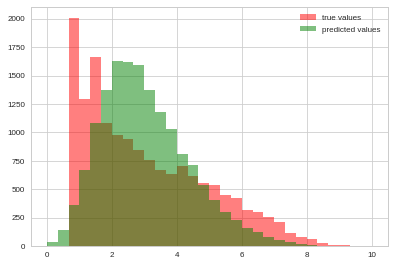

In [47]:
%%time

ridge = Ridge()
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, random_state=17)
ridge.fit(X_train, y_train);

ridge_pred = ridge.predict(X_test)
plt.hist(y_test, bins=30, alpha=.5, color='red',
         label='true values', range=(0,10));
plt.hist(ridge_pred, bins=30, alpha=.5, color='green',
         label='predicted values', range=(0,10));
plt.legend();
valid_mae = mean_absolute_error(y_test, ridge_pred)

print(valid_mae, np.expm1(valid_mae))

# 1.593240573415355 3.919665662483231
# 1.1878605076859372 2.2800560402295527ftfdtt dtdtttrtrv
# 1.187723240593236 2.2796058273734254
# 1.1152612176772003 2.0503648843511195
# 1.0977183778769664 1.9973194658842521
# 1.0977183778769664 1.9973194658842521# 
# 1.0889315048085038 1.9710977722513383
# 1.0857285678673279 1.96159675713931
# 1.0856355959792474 1.9613214246963528
# 1.0851571497549866 1.9599049305270484

#### Test dataset prep

In [48]:
%%time
content_sparse_test = content_vectorizer.transform(X_test_feats['content'])

CPU times: user 38min 40s, sys: 1.59 s, total: 38min 42s
Wall time: 41min 20s


In [0]:
from scipy import sparse

sparse.save_npz("content_sparse_test.npz", content_sparse_test)
content_sparse_test = sparse.load_npz("content_sparse_test.npz")

In [54]:
%%time
author_sparse = author_vectorizer.transform(X_test_feats['author'])


title_length_types = get_title_features(X_test_feats['title'])

length_scaled = lengths_scaler.transform(X_test_feats['length'].reshape(-1,1))


title_sparse = title_vectorizer.transform(X_test_feats['title'])


X_test_feats.drop(['author','content', 'title','domain', 'tags', 'published', 'url','target'], axis=1, inplace=True)

test_data = hstack([X_test_feats,
                     title_sparse,
#                      title_length_types, 
                    length_scaled,
                     author_sparse,
                      content_sparse_test
                     ]).tocsr()

CPU times: user 18.7 s, sys: 200 ms, total: 18.9 s
Wall time: 18.9 s


In [55]:
content_sparse_test

<34645x80000 sparse matrix of type '<class 'numpy.float64'>'
	with 16117668 stored elements in Compressed Sparse Row format>

In [0]:
ridge_test_pred = ridge.predict(test_data)

In [57]:
ridge_test_pred.shape

(34645,)

In [0]:
submission = pd.read_csv('sample_submission.csv', index_col='id')

submission['log_recommends'] = ridge_test_pred
submission.to_csv('submission_11.csv')

In [168]:
# LDA Methodology
!pip install pyldavis


import pyLDAvis.gensim
import gensim
from gensim.matutils  import Sparse2Corpus
from gensim.corpora import Dictionary
from gensim.models import LdaModel

    100% |████████████████████████████████| 1.6MB 14.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [0]:
#Transform our sparse_data to corpus for gensim
corpus_data_gensim = gensim.matutils.Sparse2Corpus(train_data, documents_columns=False)

In [0]:
# full_sparse_data =  sparse.vstack([train_data, test_data])

In [0]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from scipy import sparse
import pyLDAvis.gensim
import gensim
from gensim.matutils  import Sparse2Corpus
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.linear_model import Ridge
import io

In [0]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [0]:
def read_json_line(line=None):
    result = None
    try:        
        result = json.loads(line)
    except Exception as e:      
        idx_to_replace = int(str(e).split(' ')[-1].replace(')',''))      
        new_line = list(line)
        new_line[idx_to_replace] = ' '
        new_line = ' '.join(new_line)     
        return read_json_line(line=new_line)
    return result
  
  
def preprocess(path_to_inp_json_file):
    output_list = []
    with open(path_to_inp_json_file, encoding='utf-8') as inp_file:              
        for line in tqdm_notebook(inp_file):
            json_data = read_json_line(line)
            content = json_data['content'].replace('\n', ' ').replace('\r', ' ')
            content_no_html_tags = strip_tags(content)
            output_list.append(content_no_html_tags)
    return output_list

In [183]:
!ls "/content/drive/My Drive/medium"

content_sparse_train.npz  test.json.zip   train_log1p_recommends.csv
sample_submission.csv	  train.csv
test.csv		  train.json.zip


In [0]:
PATH_TO_DATA = "/content/drive/My Drive/medium"

In [206]:
# train_raw_content = preprocess(path_to_inp_json_file=os.path.join(PATH_TO_DATA, 'train.json.zip'),)


train_raw_content = preprocess("/content/drive/My Drive/medium/train.json.zip")

AttributeError: ignored

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_raw_content = preprocess('train.json')

In [0]:
test_raw_content = preprocess(path_to_inp_json_file=os.path.join(PATH_TO_DATA,  'test.json'),)